## Cameras

In [1]:
from src.vision import Camera

mba_video_camera = Camera(
    h_fov=59.0,
    h_res=1080,
    v_res=720,
)

mba_photo_camera = Camera(
    h_fov=67.0,
    h_res=1290,
    v_res=720,
)

zed_two_camera = Camera(
    h_fov=110.0,
    v_fov=70.0,
)

avg_shoulder_width = 350.0
avg_torso_height = 460.0


In [2]:
from src.point import Point

ref_points = [
    Point(0, 0),
    Point(1200, 0),
    Point(2200, 0),
    Point(4200, 0),
    Point(3000, 1280),
    Point(3995, 1590),
    Point(3005, -1150),
    Point(4000, -1490),
]
print(ref_points)


[Point(x=0, y=0, a=None), Point(x=1200, y=0, a=None), Point(x=2200, y=0, a=None), Point(x=4200, y=0, a=None), Point(x=3000, y=1280, a=None), Point(x=3995, y=1590, a=None), Point(x=3005, y=-1150, a=None), Point(x=4000, y=-1490, a=None)]


In [3]:
from IPython.display import clear_output

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np
import pandas as pd
import cv2
import time

import torch



## Moving Vehicle Example

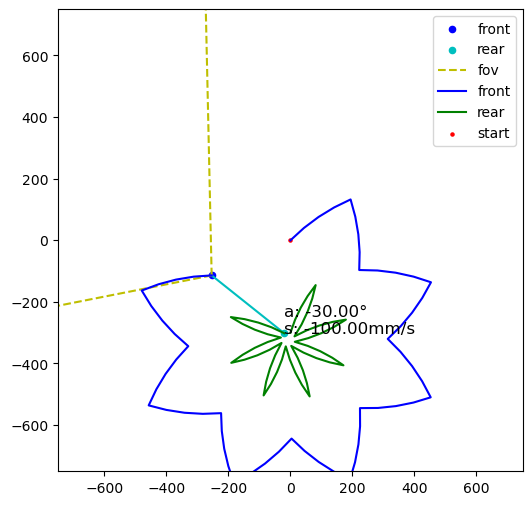

In [17]:
from src.vehicle import Vehicle
from src.point import create_map

# grid of points from -750 to 750 with step 250
points = []
for i in range(-750, 751, 250):
    for j in range(-750, 751, 250):
        points.append(Point(i, j))

vehicle = Vehicle(
    max_turn_angle=30, 
    axle_len=300, 
    max_speed=2000, 
    camera=zed_two_camera,
    center=Point(0, 0)
)
speed, wheel_angle = 100, 0

# set_speed(speed) in mm/s
# set_wheel_angle(angle) in degrees
# update_position(time) in seconds

# given variables
desired_angle = 300
max_distance = 200
speed = 100

initial_angle = vehicle.get_front().a
base_position = vehicle.center.copy()
time = max_distance / speed

direction = 1 if desired_angle > 0 else -1
first = 0

#implement turn at the end to get right angle

positions_xf = []
positions_yf = []
positions_xb = []
positions_yb = []

positions_xf.append(vehicle.front.x)
positions_yf.append(vehicle.front.y)
positions_xb.append(vehicle.rear.x)
positions_yb.append(vehicle.rear.y)

smoothing = 4
while vehicle.get_front().a - initial_angle < desired_angle:
    turn_angle = np.degrees(vehicle.max_turn_angle) * direction

    for i in range(smoothing):

        if first < smoothing and False:
            first += 1
            vehicle.set_speed(speed)
            vehicle.set_wheel_angle(0)
            vehicle.update_position(time/smoothing * 2.5)
        else:
            vehicle.set_speed(speed)
            vehicle.set_wheel_angle(turn_angle)
            vehicle.update_position(time/smoothing)

        positions_xf.append(vehicle.front.x)
        positions_yf.append(vehicle.front.y)
        positions_xb.append(vehicle.rear.x)
        positions_yb.append(vehicle.rear.y)

        clear_output(wait=True)
        fig, ax = create_map(Point(0, 0), 1500, 6)
        vehicle.plot(ax)

        plt.plot(positions_yf, positions_xf, color='blue', label='front')
        plt.plot(positions_yb, positions_xb, color='green', label='rear')
        plt.scatter(0, 0, color='red', s=5, label='start')

        ax.legend()
        plt.show()

    speed = -speed
    direction = -direction
